In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from 指标计算 import *

plt.rcParams['font.sans-serif']=['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus']=False   # 解决保存图像是负号'-'显示为方块的问题

In [ ]:
# 简单画趋势个图
dataNew = cal_main('../DB/GFEX.csv', 'SI')
plt.plot(dataNew['close'])

## 使用线性回归

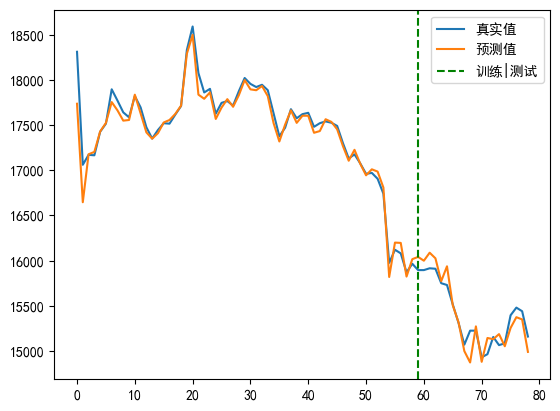

In [2]:
# 导入所需库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 定义特征和目标值
features = ['open', 'high', 'low', 'close', 'volume', 'open_interest', 'turnover']
target = 'next_close'
allField = features + [target]
# 数据读取
data = cal_main('../DB/GFEX.csv', 'SI')
# 使用第二天的close值作为，每个样本的目标值
data['next_close'] = data['close'].shift(-1)
data.drop(data.index[-1], inplace=True)
# 对每一列数据进行标准化
scaler = StandardScaler()
data[allField] = scaler.fit_transform(data[allField])
# 划分数据集为训练集和测试集
train_size = int(len(data) * 0.75)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
# 创建线性模型、训练拟合
lr = LinearRegression()
lr.fit(train_data[features], train_data[target])
# 预测结果
train_predictions = lr.predict(train_data[features])
test_predictions = lr.predict(test_data[features])
pre = np.hstack([train_predictions, test_predictions])
# 反标准化还原数据
preNew = data.copy()
dataNew = data.copy()
preNew['next_close'] = pre
dataNew[allField] = scaler.inverse_transform(dataNew[allField])
preNew[allField] = scaler.inverse_transform(preNew[allField])
# 画图
plt.plot(dataNew['close'], label='真实值')
plt.plot(preNew['next_close'], label='预测值')
plt.axvline(train_size, linestyle='--', color='green', label='训练|测试')
plt.legend()

# 使用岭回归

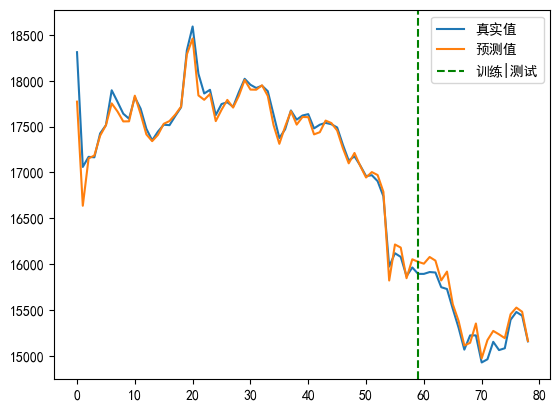

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 定义特征和目标值
features = ['open', 'high', 'low', 'close', 'volume', 'open_interest', 'turnover']
target = 'next_close'
allField = features + [target]
# 数据读取
data = cal_main('../DB/GFEX.csv', 'SI')
# 使用第二天的close值作为，每个样本的目标值
data['next_close'] = data['close'].shift(-1)
data.drop(data.index[-1], inplace=True)
# 对每一列数据进行标准化
scaler = StandardScaler()
data[allField] = scaler.fit_transform(data[allField])
# 划分数据集为训练集和测试集
train_size = int(len(data) * 0.75)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
# 创建岭回归模型并训练
alpha = 0.03 # 正则化参数
ridge = Ridge(alpha=alpha)
ridge.fit(train_data[features], train_data[target])
# 预测结果
train_predictions = ridge.predict(train_data[features])
test_predictions = ridge.predict(test_data[features])
pre = np.hstack([train_predictions, test_predictions])
# 反标准化还原数据
preNew = data.copy()
dataNew = data.copy()
preNew['next_close'] = pre
dataNew[allField] = scaler.inverse_transform(dataNew[allField])
preNew[allField] = scaler.inverse_transform(preNew[allField])
# 画图
plt.plot(dataNew['close'], label='真实值')
plt.plot(preNew['next_close'], label='预测值')
plt.axvline(train_size, linestyle='--', color='green', label='训练|测试')
plt.legend()

## 使用随机森林

In [ ]:
#最佳参数
# rf = RandomForestClassifier(n_estimators=3, max_depth=6, random_state=4)
# rf = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=0)
# ['open', 'high', 'low', 'close', 'volume', 'MACD', 'MTM', 'RSI', 'BIAS', 'ROC', 'MA', 'WR', 'CCI', 'K', 'D', 'J']

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 读取数据
data = cal_main('../DB/GFEX.csv', 'SI')
# 定义特征和目标变量
features = ['open', 'high', 'low', 'close', 'volume', 'open_interest', 'turnover']
target = 'next_change'
# 对每一列数据进行标准化
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# 计算涨跌情况
data['change'] = data['close'].diff().shift(-1)
data['next_change'] = data['change'].apply(lambda x: 1 if x > 0 else 0)
# 删除最后一个样本（目标变量为NaN）
data.drop(data.index[-1], inplace=True)
# 划分数据集为训练集和测试集
train_size = int(len(data) * 0.75)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]
# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=3, max_depth=6, random_state=4)
# 训练模型
rf.fit(train_data[features], train_data[target])
# 进行预测
train_predictions = rf.predict(train_data[features])
test_predictions = rf.predict(test_data[features])
# 计算模型准确率
train_accuracy = accuracy_score(train_data[target], train_predictions)
test_accuracy = accuracy_score(test_data[target], test_predictions)

print(f'训练集准确率:', train_accuracy)
print(f'测试集准确率:', test_accuracy)

训练集准确率: 0.8813559322033898
测试集准确率: 0.75


## 模型评价